# Link Google Colab
[Google Colab](https://colab.research.google.com/drive/1gJSSO4UcsSXhHgg5288NsccDiRuIIkUx?usp=sharing)

## Install and Import Library

In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
!pip install --pre -U pycaret
!pip install pycaret[full]
!pip install sktime==0.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from google.colab import drive
from datetime import datetime
import pytz

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.impute import SimpleImputer

import pycaret
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment

## Load Data

In [ ]:
!wget https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx

--2024-09-04 19:29:10--  https://github.com/hilmizr/world_fertilizer_price/raw/master/01-09-24-modified_fertilizer_datav5.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/01-09-24-modified_fertilizer_datav5.xlsx [following]
--2024-09-04 19:29:10--  https://raw.githubusercontent.com/hilmizr/world_fertilizer_price/master/01-09-24-modified_fertilizer_datav5.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42737 (42K) [application/octet-stream]
Saving to: ‘01-09-24-modified_fertilizer_datav5.xlsx’

01-09-24-modified_f 100%[===================>]  41.74K  

In [ ]:
date_col = 'date'
target_col = 'urea_price'

In [ ]:
data = pd.read_excel('01-09-24-modified_fertilizer_datav5.xlsx')
data

,date,dap_price,kcl_price,rock_price,tsp_price,urea_price
0,1993-11-01,140.40,112.50,31.5,112.50,82.80
1,1993-12-01,150.38,112.50,31.5,122.50,85.50
2,1994-01-01,150.00,112.50,31.5,125.00,85.50
3,1994-02-01,151.75,112.50,31.5,125.63,85.50
4,1994-03-01,155.88,112.50,31.5,127.50,98.63
...,...,...,...,...,...,...
361,2023-12-01,563.75,311.88,152.5,447.50,354.00
362,2024-01-01,596.25,296.25,152.5,450.63,335.38
363,2024-02-01,583.81,289.38,152.5,454.38,351.25
364,2024-03-01,617.50,300.50,152.5,449.00,330.00


In [ ]:
data = data[[date_col, target_col]]
data

,date,urea_price
0,1993-11-01,82.80
1,1993-12-01,85.50
2,1994-01-01,85.50
3,1994-02-01,85.50
4,1994-03-01,98.63
...,...,...
361,2023-12-01,354.00
362,2024-01-01,335.38
363,2024-02-01,351.25
364,2024-03-01,330.00


# Data Preparation

## Format Data

In [ ]:
data[date_col] = pd.to_datetime(data[date_col])
data.set_index(date_col, inplace=True)
data = data.asfreq('MS')

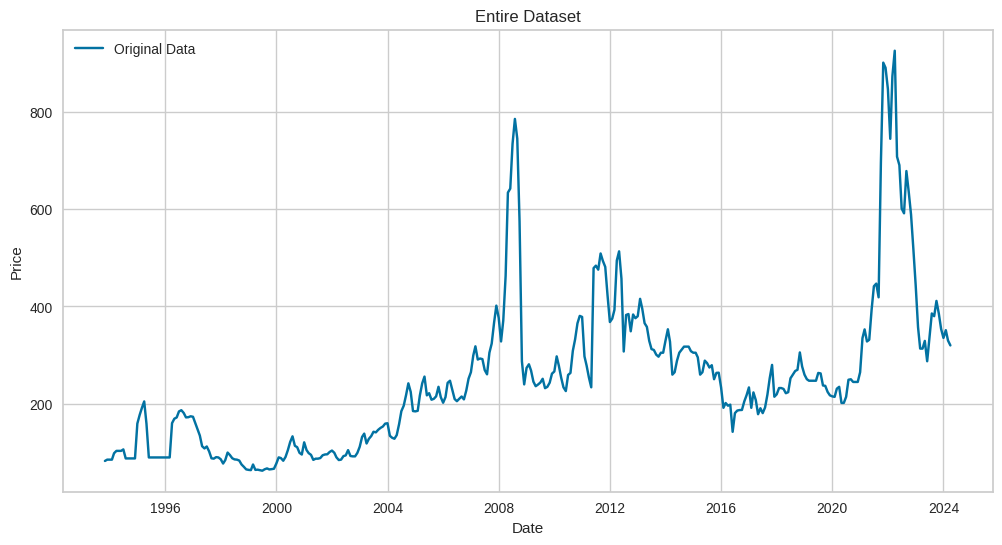

In [ ]:
# Plot the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[target_col], label='Original Data')
plt.title('Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Detect and Interpolate Null and Zero Values

In [ ]:
data[target_col] = data[target_col].replace(0, np.nan)
if data[target_col].isnull().any():
  data[target_col] = data[target_col].interpolate(method='linear')
  data[target_col] = data[target_col].fillna(method='ffill').fillna(method='bfill')

## Train Test Split

In [ ]:
n_test = 6

In [ ]:
train_data, test_data = train_test_split(data, test_size=n_test, shuffle=False)

In [ ]:
train_data

,urea_price
date,
1993-11-01,82.80
1993-12-01,85.50
1994-01-01,85.50
1994-02-01,85.50
1994-03-01,98.63
...,...
2023-06-01,287.50
2023-07-01,334.63
2023-08-01,385.63


In [ ]:
test_data

,urea_price
date,
2023-11-01,385.50
2023-12-01,354.00
2024-01-01,335.38
2024-02-01,351.25
2024-03-01,330.00
2024-04-01,320.00


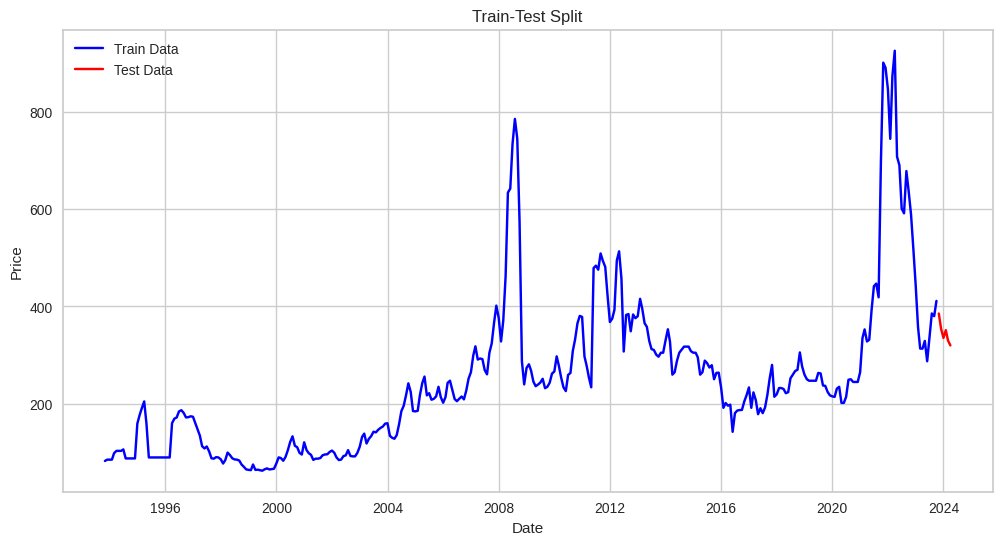

In [ ]:
# Plot the train and test split
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[target_col], label='Train Data', color='blue')
plt.plot(test_data.index, test_data[target_col], label='Test Data', color='red')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Ensemble Modeling

## Setup Training Environment and Pipeline

In [ ]:
s = setup(
    data,
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(366, 1)"
5,Transformed data shape,"(366, 1)"
6,Transformed train set shape,"(360, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
exp = TSForecastingExperiment()
exp.setup(
    data,
    fh = n_test,
    target = target_col,
    session_id = 123)

,Description,Value
0,session_id,123
1,Target,urea_price
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(366, 1)"
5,Transformed data shape,"(366, 1)"
6,Transformed train set shape,"(360, 1)"
7,Transformed test set shape,"(6, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


## Identify Best Models based on Metric


In [ ]:
best_models_top = compare_models(
    sort = 'MAPE',
    exclude=['auto_arima'],
    n_select = 3
    )
best_models_top

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.8302,0.6484,84.1312,98.3149,0.1949,0.1835,-2.9429,0.1900
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.8112,0.6195,82.5879,94.7445,0.2059,0.1682,-1.1286,3.7300
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.1950,0.8922,119.6457,134.3740,0.2534,0.2203,-7.9412,0.1600
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1438,0.8161,115.8125,123.9419,0.2588,0.2433,-5.0433,56.5133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.2268,0.9022,123.4635,136.5777,0.2736,0.2338,-6.1944,0.1800
polytrend,Polynomial Trend Forecaster,1.4066,0.9921,140.5259,148.9534,0.2774,0.2998,-12.2634,0.0200
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1350,0.8846,115.7871,135.4940,0.2885,0.2349,-3.4213,0.3833
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.2395,0.9327,125.4806,141.8957,0.2898,0.2540,-5.7065,0.3000
arima,ARIMA,1.3603,0.9763,136.5668,147.3616,0.2925,0.2521,-8.6572,0.2333
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.2831,0.9411,129.2477,142.5555,0.2942,0.2326,-6.1666,0.2067


Processing:   0%|          | 0/119 [00:00<?, ?it/s]

[BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [37, 36,
                                                                         35, 34,
                                                                         33, 32,
                                                                         31, 30,
                                                                         29, 28,
                                                                         27, 26,
                                                                         25, 24,
                                                                         23, 22,
                                                                         21, 20,
                                                                         19, 18,
                                                                         17, 16,
                                                                         15, 14,
                            

## Blend Model

In [ ]:
blender = blend_models(best_models_top)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-04,0.7023,0.5665,68.4534,82.8808,0.1056,0.0981,-2.5139
1,2022-10,1.1041,0.8686,114.0436,134.8771,0.3277,0.2633,-0.6667
2,2023-04,0.2069,0.1870,21.7500,29.3241,0.0669,0.0634,0.5027
Mean,NaT,0.6711,0.5407,68.0823,82.3607,0.1667,0.1416,-0.8926
SD,NaT,0.3669,0.2789,37.6796,43.0934,0.1149,0.0872,1.2419


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Predict

In [ ]:
holdout_pred = predict_model(blender)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,0.7561,0.5425,79.8131,84.8709,0.2363,0.2081,-15.0270


In [ ]:
holdout_pred

,y_pred
2023-11,417.4793
2023-12,416.7897
2024-01,416.9725
2024-02,425.9513
2024-03,438.1857
2024-04,439.6303


## Visualize

In [ ]:
plot_model(blender, plot = 'forecast')

In [ ]:
plot_model(plot = 'diagnostics')

## Compare

In [ ]:
actual = test_data[target_col].values
pred = holdout_pred.values.flatten()

In [ ]:
# Comparison DataFrame
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': pred})
comparison_df.index = test_data.index
comparison_df

,Actual,Predicted
date,,
2023-11-01,385.50,417.4793
2023-12-01,354.00,416.7897
2024-01-01,335.38,416.9725
2024-02-01,351.25,425.9513
2024-03-01,330.00,438.1857
2024-04-01,320.00,439.6303


## Evaluate

In [ ]:
def evaluate_forecast(y_true, y_pred):
    results = {
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }
    return pd.Series(results)

In [ ]:
# Evaluating the model on the test predictions
evaluation_results = evaluate_forecast(comparison_df['Actual'], comparison_df['Predicted'])
evaluation_results

,0
MAPE,0.236327
RMSE,84.870879
MAE,79.813133
R2,-15.027031


## Save / Load Model

In [ ]:
save_model(blender, 'basic_ensemble_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 EnsembleForecaster(forecasters=[('KNeighborsRegressor',
                                                                                                  BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [37,
                                                                                                                                                                          36,
                                                                                                                                                                          35,
                                                                                                                                                                          34,
                                                                  

In [ ]:
loaded_from_disk = load_model('basic_ensemble_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                EnsembleForecaster(forecasters=[('KNeighborsRegressor',
                                                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [37,
                                                                                                                                                                         36,
                                                                                                                                                                         35,
                                                                                                                                                                         34,
                                                                                                                                                                         33,
                                                                                                                                                                         32,
                                                                                                                                                                         31,
                                                                                                                                                                         30,
                                                                                                                                                                         29,
                                                                                                                                                                         28,
                                                                                                                                                                         27,
                                                                                                                                                                         26,
                                                                                                                                                                         25,
                                                                                                                                                                         24,
                                                                                                                                                                         23,
                                                                                                                                                                         22,
                                                                                                                                                                         21,
                                                                                                                                                                         20,
                                                                                                                                                                         19,
                                                                                                                                                                         18,
                                                                                                                                                                         17,
                                                                                                                                    